# Classification Orange

Dans cette seconde partie du TP, nous utiliserons un algorithme Random Forest pour réaffecter les individus dans les groupes tout en minimisant le nombre de variables utilisées (Golden questions).

## Variables oranges

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
n_estimators = 1000

data = pd.read_csv("../data/orange.csv")
data = data.drop(columns=["Respondent_ID"])
data


,cle,weight,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,...,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice,cluster
0,1,2.501255,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
1,2,0.722914,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,3
2,3,1.039611,3,2,2,2,3,2,2,2,...,2,2,2,2,2,2,2,2,2,0
3,4,0.976590,1,2,2,2,3,2,3,2,...,1,2,3,3,3,2,2,1,2,0
4,5,0.812315,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,0.905997,3,2,3,4,3,2,2,2,...,1,2,1,1,1,1,1,1,1,3
4996,4997,1.257884,2,3,4,3,3,2,4,2,...,2,3,2,2,2,2,3,2,4,1
4997,4998,1.094695,3,4,4,3,2,2,4,4,...,2,3,3,3,2,3,3,2,3,1
4998,4999,2.022023,3,3,4,3,3,2,3,3,...,3,2,3,2,3,2,2,1,3,1


In [3]:
data.dtypes


cle               int64
weight          float64
A9_1_slice        int64
A9_2_slice        int64
A9_3_slice        int64
A9_4_slice        int64
A9_5_slice        int64
A9_6_slice        int64
A9_7_slice        int64
A9_8_slice        int64
A9_9_slice        int64
A9_10_slice       int64
A9_11_slice       int64
A9_12_slice       int64
A9_13_slice       int64
A9_14_slice       int64
A9_15_slice       int64
A9_16_slice       int64
A10_1_slice       int64
A10_2_slice       int64
A10_3_slice       int64
A10_4_slice       int64
A10_5_slice       int64
A10_6_slice       int64
A10_7_slice       int64
A10_8_slice       int64
A11_1_slice       int64
A11_2_slice       int64
A11_3_slice       int64
A11_4_slice       int64
A11_5_slice       int64
A11_6_slice       int64
A11_7_slice       int64
A11_8_slice       int64
A11_9_slice       int64
A11_10_slice      int64
A11_11_slice      int64
A11_12_slice      int64
A11_13_slice      int64
cluster           int64
dtype: object

### Entraînement de la Random Forest

In [4]:
X = data.drop(columns=['cluster'])
y = data['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(X_train), len(X_test))

3500 1500


In [5]:
rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

### Evaluer la Random Forest

In [6]:
y_pred = rf_model.predict(X_test)


In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.928
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       619
           1       0.90      0.92      0.91       423
           2       1.00      0.86      0.92       114
           3       0.96      0.94      0.95       344

    accuracy                           0.93      1500
   macro avg       0.94      0.92      0.93      1500
weighted avg       0.93      0.93      0.93      1500



### Identifier les variables importantes

In [8]:
feature_importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
9,A9_8_slice,0.054836
32,A11_7_slice,0.052725
30,A11_5_slice,0.051633
33,A11_8_slice,0.046888
36,A11_11_slice,0.046582
38,A11_13_slice,0.043293
5,A9_4_slice,0.041781
35,A11_10_slice,0.041338
4,A9_3_slice,0.040899
2,A9_1_slice,0.036730


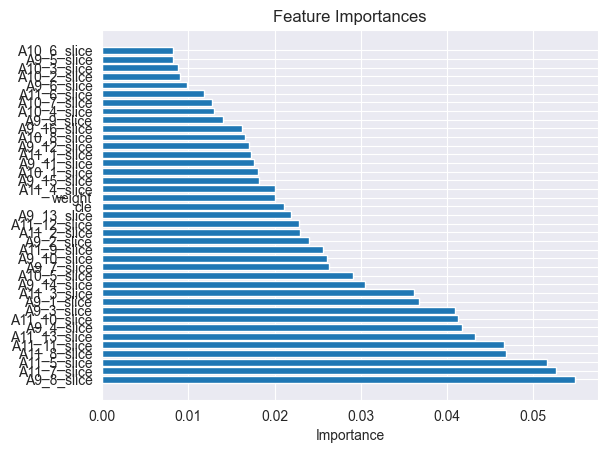

In [9]:
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


### Minimiser les variables

In [10]:
num_golden = range(39, 0, -1)
accuracies = []

for i in num_golden:
    selected_features = importance_df['Feature'].head(i).tolist()
    
    X_train_reduced = X_train[selected_features]
    X_test_reduced = X_test[selected_features]
    
    rf_model_reduced = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model_reduced.fit(X_train_reduced, y_train)
    
    y_reduced_pred = rf_model_reduced.predict(X_test_reduced)
    accuracies.append(accuracy_score(y_test, y_reduced_pred))


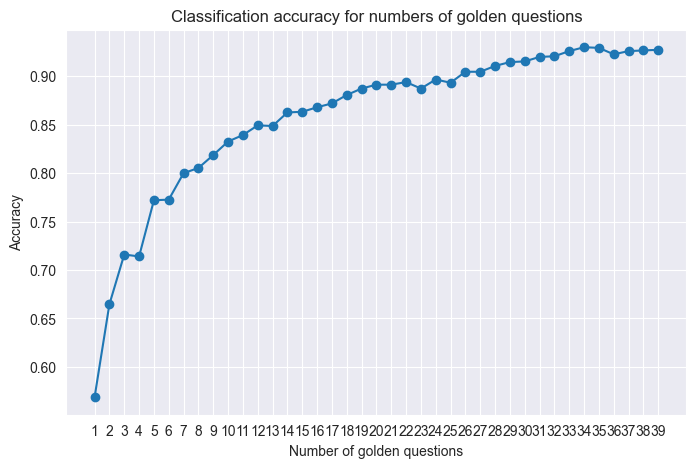

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(num_golden, accuracies, marker='o')
plt.title("Classification accuracy for numbers of golden questions")
plt.xlabel("Number of golden questions")
plt.ylabel("Accuracy")
plt.xticks(num_golden)
plt.show()


On considère qu'à partir de 26 golden questions, le taux d'accroissement de la courbe est négligeable (variabtion de 90% à 92.8%). De plus, à partir de 34 questions, le taux d'accroissement de la courbe devient quasi nul, voire négatif. Pour ces raisons, on va donc chercher la valeur optimale de golden question dans l'intervale [26;34]

In [12]:
num_golden = range(26, 35)
accuracies = {0: [], 1: [], 2: [], 3: []}

for i in num_golden:
    selected_features = importance_df['Feature'].head(i).tolist()
    
    X_train_reduced = X_train[selected_features]
    X_test_reduced = X_test[selected_features]
    
    rf_model_reduced = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model_reduced.fit(X_train_reduced, y_train)
    
    y_reduced_pred = rf_model_reduced.predict(X_test_reduced)
    report = classification_report(y_test, y_reduced_pred, output_dict=True)
    
    accuracies[0].append(report['0']['precision'])
    accuracies[1].append(report['1']['precision'])
    accuracies[2].append(report['2']['precision'])
    accuracies[3].append(report['3']['precision'])


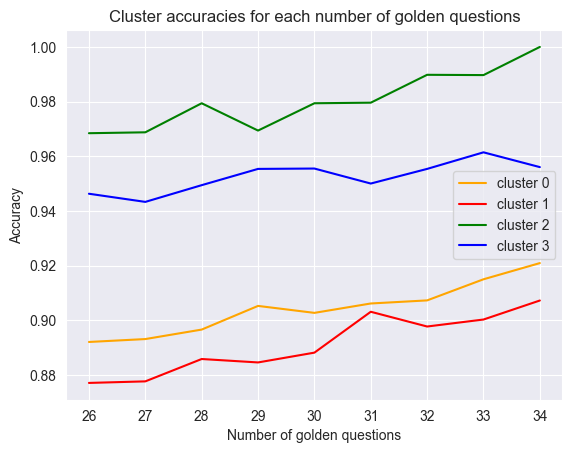

In [13]:
# Tracer les courbes
plt.plot(num_golden, accuracies[0], label="cluster 0", color="orange")
plt.plot(num_golden, accuracies[1], label="cluster 1", color="red")
plt.plot(num_golden, accuracies[2], label="cluster 2", color="green")
plt.plot(num_golden, accuracies[3], label="cluster 3", color="blue")

# Ajouter des légendes
plt.title("Cluster accuracies for each number of golden questions")
plt.xlabel("Number of golden questions")
plt.ylabel("Accuracy")
plt.legend()


On se rend compte que la précisions sur chaque cluster augmente très sensiblement à mesure que le nombre de golden questions augmente. De ce fait, nous sélectionnerons la valeur 26 comme nombre de golden questions dans cette enquête.